In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SANDBOX')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, 
                      secret=PLAID_SECRET,
                      public_key=PLAID_PUBLIC_KEY,
                      environment="sandbox" )


client.Institutions.get(1)


{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'reA4SfEalGilOhN',
 'total': 10399}

### 2. Generate a public token

In [6]:
# cREATE PUBLIC TOKEN TO BE EXCHANGED FOR INSTITUTUION ACCESS TOKEN
create_token_response= client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])







### 3. Exchange the public token for an access token

In [7]:
#EXCHANGE PUBLIC TOKEN FOR ACCESS TOKEN

exchange_response= client.Item.public_token.exchange(create_token_response['public_token'])


#store access token as variable

access_token=exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
#  Get accounts associated with institution
client.Accounts.get(access_token)



{'accounts': [{'account_id': '9DpxGj7ANMuKdaJa6nqoIW7RK1wgvluRLEV4b',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'vyz4pJDP9WUWL4b4aX7PH6qjLADrvaiWjXnqL',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'R6LrRAM5XyCXg5q5W6rAIXv3raW1AJCRKGXam',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

### 2. Print the categories for each transaction

In [10]:

# transaction_data = transaction_data.sort(['date', 'name', 'amount', 'category'])
df = pd.DataFrame(transactions_response['transactions'])
# df
df = df[['date','name', 'amount', 'category']]
df.columns
df

,date,name,amount,category
0,2019-09-03,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
1,2019-09-01,Uber 072515 SF**POOL**,6.33,"[Travel, Car Service, Ride Share]"
2,2019-08-29,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
4,2019-08-28,KFC,500.00,"[Food and Drink, Restaurants]"
5,2019-08-28,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
6,2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
7,2019-08-19,Uber 063015 SF**POOL**,5.40,"[Travel, Car Service, Ride Share]"
8,2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
9,2019-08-18,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [38]:
# YOUR CODE HERE
trans_df = df.set_index('date')

trans_df.index = pd.to_datetime(trans_df.index)
trans_df.sort_index(inplace=True)
# trans_df['category'].astype(str)
# trans_df['category'] = trans_df['category'].astype('str') 
# print(trans_df['category']).dtype
# trans_df['category'].iloc[0]

In [39]:
# trans_df.loc[trans_df['category'].str.contains(','),:]

trans_df.loc[:, 'new_col'] =trans_df.category.map(lambda x: x[0])
# trans_df['category'] = trans_df['new_col']
del trans_df['category']
trans_df.rename(columns={'new_col':'categories'},inplace=True)

trans_df

,name,amount,categories
date,,,
2019-08-14,INTRST PYMNT,-4.22,Transfer
2019-08-15,SparkFun,89.40,Food and Drink
2019-08-16,McDonald's,12.00,Food and Drink
2019-08-16,Starbucks,4.33,Food and Drink
2019-08-17,Touchstone Climbing,78.50,Recreation
2019-08-17,United Airlines,-500.00,Travel
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-08-18,CD DEPOSIT .INITIAL.,1000.00,Transfer
2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [36]:
#Datetime was done above

# float will be done here 
trans_df["amount"] = pd.to_numeric(trans_df.amount, errors= 'coerce')

trans_df['amount']

date
2019-08-14      -4.22
2019-08-15      89.40
2019-08-16      12.00
2019-08-16       4.33
2019-08-17      78.50
2019-08-17    -500.00
2019-08-18    5850.00
2019-08-18    1000.00
2019-08-19      25.00
2019-08-19       5.40
2019-08-28    2078.50
2019-08-28     500.00
2019-08-28     500.00
2019-08-29     500.00
2019-09-01       6.33
2019-09-03     500.00
Name: amount, dtype: float64

In [14]:
trans_df.head()

,name,amount,categories
date,,,
2019-08-14,INTRST PYMNT,-4.22,Transfer
2019-08-15,SparkFun,89.40,Food and Drink
2019-08-16,McDonald's,12.00,Food and Drink
2019-08-16,Starbucks,4.33,Food and Drink
2019-08-17,Touchstone Climbing,78.50,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [16]:
# start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
# end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
# income_response = client.Income.get(access_token, start_date, end_date)


client.Income.get(access_token)



{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'j7ODw1GxjU2pnY5'}

In [17]:
income_response = client.Income.get(access_token)

In [18]:
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'hNAmzvflQAf6dEs'}

In [19]:
##Monthly Income

income_monthly = income_response['income']['income_streams'][0]['monthly_income']
im = income_monthly

print(f"This mans monthly income is an abysmal: ${im}")

This mans monthly income is an abysmal: $500


In [20]:
#Projected Yearly Income 
yearly_data = income_response['income']['projected_yearly_income']
iy = yearly_data

print(f"This mans yearly income is an abysmal: ${iy}")

This mans yearly income is an abysmal: $6085


In [21]:
##Last year Gross income before Tax
last_income_data = income_response['income']['projected_yearly_income_before_tax']
igy=last_income_data



print(f"Last year, this mans yearly Gross income is an abysmal: ${igy}")

Last year, this mans yearly Gross income is an abysmal: $7389


# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [35]:
trans_df

,name,amount,categories
date,,,
2019-08-14,INTRST PYMNT,-4.22,Transfer
2019-08-15,SparkFun,89.40,Food and Drink
2019-08-16,McDonald's,12.00,Food and Drink
2019-08-16,Starbucks,4.33,Food and Drink
2019-08-17,Touchstone Climbing,78.50,Recreation
2019-08-17,United Airlines,-500.00,Travel
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-08-18,CD DEPOSIT .INITIAL.,1000.00,Transfer
2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,Payment


In [23]:


grp_spending = trans_df.groupby(trans_df.categories)['amount'].sum()
grp_spending

categories
Food and Drink    1105.73
Payment           2103.50
Recreation          78.50
Shops              500.00
Transfer          6845.78
Travel              11.73
Name: amount, dtype: float64

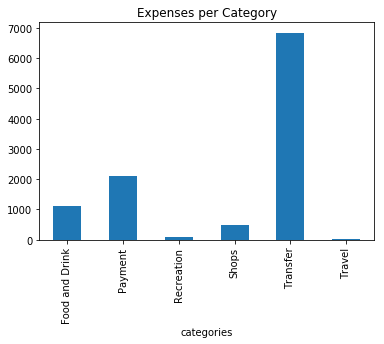

In [24]:


grp_spending.plot(kind='bar', title='Expenses per Category')

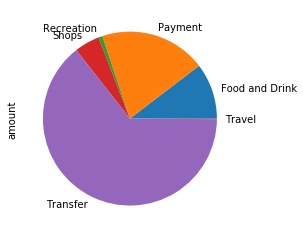

In [25]:
grp_spending.plot(kind='pie')

### Calculate the expenses per month

In [26]:
# grp_monthly = trans_df.groupby(trans_df.index.month)['amount'].sum()
# mo = trans_df.groupby(trans_df.index.month)['categories']

# month = mo.groupby(mo)

In [27]:
df_amounts = trans_df.filter(['date', 'amount'])
mogroup= df_amounts.groupby(df_amounts.index.month).sum()

# df_amounts
mogroup

,amount
date,
8,10138.91
9,506.33


In [28]:
#TODO PIE CHART OF SPENDING CATEGORIES

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEA9879780>],
      dtype=object)

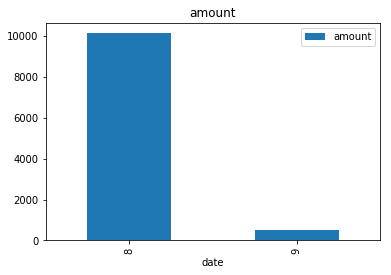

In [34]:
mogroup.plot(kind='bar',subplots=True)